<img src = "https://www.bits-pilani.ac.in/Uploads/Campus/BITS_university_logo.gif">

<h1><center>Work Integrated Learning Programmes Division<br>
M.Tech (Data Science and Engineering)<br> Data Visualization And Interpretation <br>
</center></h1>

<h2><center>Assignment 2 – PS7 [Weightage 13%]</center></h2>

## Instructions
<ol>
  <li>Do not change the name of the data file that is shared with the problem statement.</li>
  <li>If intermediate data files are created, retain in the present working directory and attach them during submission.</li>
  <li>Retain the data file in the same directory as that of this workbook.</li>
  <li>Retain the Visualizations that is produced in the file. Don't clear them away.</li>
    <li><b><div class="alert-warning">All the visuals should adhere to the visualization principles learnt in the Course and must be presentation ready.Most effective visuals would fetch maximum credits</div></b></li>    
    <li><b><div class="alert-warning">Submissions done via means other than CANVAS will strictly be NOT graded.</div></b></li>
    


  
</ol>

<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>

<h2>Group No: 48</h2>

<table style="float: left;width: 35%;text-align: left; margin-left: 3rem;">
  <tr>
    <th style="text-align: left;">Full Name</th>
    <th style="text-align: left;">BITS ID</th>
  </tr>
  <tr>
    <td style="text-align: left;">Shehza Fathima</td>
    <td style="text-align: left;">2021C104174</td>
  </tr>
  <tr>
    <td style="text-align: left;">Nithin Krishnan</td>
    <td style="text-align: left;">2021C104176</td>
  </tr>
  <tr>
    <td style="text-align: left;">Binsu Elizabeth Varghese</td>
    <td style="text-align: left;">2021C104187</td>
  </tr>
</table>

<h1>Objective</h1>
<h4>Perform EDA on the data set.</h4>



##  Download and Prep the Data: 1 Mark

<h4>Import the libraries needed</h4>

In [164]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import skew
from prettytable import PrettyTable
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None

<h4> Load data and store in dataframe </h4>

In [165]:
#Loading Data from the csv file into dataframe df
df = pd.read_csv('dvi-a2-ps7-data.csv')
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,costofgoodssold,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,01-05-2019,13:08,Ewallet,522.83,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,03-08-2019,10:29,Cash,76.40,9.6


<h4>Find out  what type of variable you are dealing with. This will help you find the right visualization method for that variable.</p>


In [166]:
# Attribute and its datatype
ptbl = PrettyTable()

for attribute in df.columns:    
    ptbl.field_names = ["Attribute Name", "Data Type", "Unique Values"]
    ptbl.add_row([attribute, df[attribute].dtype, df[attribute].nunique()])
    
print(ptbl)

+-----------------+-----------+---------------+
|  Attribute Name | Data Type | Unique Values |
+-----------------+-----------+---------------+
|    Invoice ID   |   object  |      1000     |
|      Branch     |   object  |       3       |
|       City      |   object  |       3       |
|  Customer type  |   object  |       2       |
|      Gender     |   object  |       2       |
|   Product line  |   object  |       6       |
|    Unit price   |  float64  |      943      |
|     Quantity    |   int64   |       10      |
|      Total      |  float64  |      990      |
|       Date      |   object  |       89      |
|       Time      |   object  |      506      |
|     Payment     |   object  |       3       |
| costofgoodssold |  float64  |      990      |
|      Rating     |  float64  |       61      |
+-----------------+-----------+---------------+


#### Display the summary statistics of the data.In a markdown cell below,explain your findings

In [167]:
#Defining class colour
class color:
   BLUE = '\033[94m'
   BOLD = '\033[1m'
   END = '\033[0m'

In [168]:
#Distribution Of numerical Data
distTxt = color.BLUE + color.BOLD + "Data Distribution of numerical attributes" + color.END
print(distTxt.center(75))
df.describe()

           Data Distribution of numerical attributes          


,Unit price,Quantity,Total,costofgoodssold,Rating
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000
mean,55.672130,5.510000,322.966749,307.58738,6.97270
std,26.494628,2.923431,245.885335,234.17651,1.71858
min,10.080000,1.000000,10.678500,10.17000,4.00000
25%,32.875000,3.000000,124.422375,118.49750,5.50000
50%,55.230000,5.000000,253.848000,241.76000,7.00000
75%,77.935000,8.000000,471.350250,448.90500,8.50000
max,99.960000,10.000000,1042.650000,993.00000,10.00000


In [169]:
#Distribution Of categorical Data
distTxt = color.BLUE + color.BOLD + "Data Distribution of categorical attributes" + color.END
print(distTxt.center(100))
df.describe(include=["O"])

                      Data Distribution of categorical attributes                      


,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,438-23-1242,A,Yangon,Member,Female,Fashion accessories,02-07-2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


#### Identify whether male/female spends more on 'Health and beauty'.Write the code below

In [170]:
# Filtering out only the "Health and beauty" Product line values from the dataset
dfc = df.loc[df['Product line'] == 'Health and beauty']

# Grouping by Gender and calculating "Spends" by summing the "Total" field
dfCat = dfc[['Gender','Total']].groupby(['Gender'],as_index=False).sum().round(2)

# Sorting the results in decreasing order
dfCat.sort_values(by='Total', ascending=False)

,Gender,Total
1,Male,30632.75
0,Female,18560.99


Male spends more on Health and Beauty

# Visualisation Questions - 2 X 5 = 10 Marks

### Question 1
<h4>Check the distribution of the Price variable .<br><br>
    Write the python code in the below cell to create appropriate visual to perform the above task.
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual..<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>
   

Text(0.5, 0, 'Unit Price')

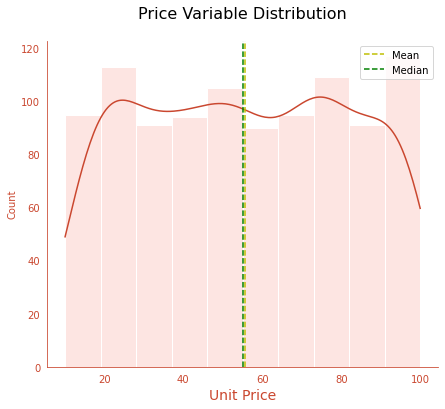

<Figure size 72x360 with 0 Axes>

In [420]:
# Creating copy of dataframe
dfc1 = df.copy()

# Defining color schemes
clrScheme1Highlight = '#ca472f'
clrScheme1Muted = '#fccdc6'
clrScheme1MildMuted = '#ca472f'

# Distribution of Unit Price (continuos) varaible
fig, ax = plt.subplots(figsize=(7, 6))
ax1 = sns.histplot(data=dfc1['Unit price'], bins=10, kde=True,
                   ax=ax, color=clrScheme1Muted, linewidth=1, edgecolor='white')
ax1.lines[0].set_color(clrScheme1Highlight)

# Setting the title for the graph
plt.title("Price Variable Distribution", size=16, y=1.05)
mean=dfc1['Unit price'].mean()
plt.axvline(mean, color='y', linestyle='--', label="Mean")
median=dfc1['Unit price'].median()
plt.axvline(median, color='g', linestyle='--', label="Median")
plt.legend()

# Setting graph size
plt.figure(figsize=(1,5))

# GRAPH CURATION
# ---- 1) Removing unneccesary chart Borders ----
sns.despine(right=True, top=True, ax=ax)

# ---- 3) Removing unneccesary tick marks ----
ax1.tick_params(left=False, bottom=False)

# ---- 4) Muting x,y values ----
ax1.tick_params(axis='x', colors=clrScheme1MildMuted)
ax1.tick_params(axis='y', colors=clrScheme1MildMuted)

# ---- 5) Muting x,y axes ----
ax1.spines['left'].set_color(clrScheme1MildMuted)
ax1.spines['bottom'].set_color(clrScheme1MildMuted)

# ---- 6) Muting x,y axis labels ----
ax.xaxis.label.set_color(clrScheme1MildMuted)
ax.yaxis.label.set_color(clrScheme1MildMuted)

# ---- 7) Changing x,y axis labels and size ----
ax.set_xlabel("Unit Price",fontsize=14)

<div style="color: #2f80d0">
<b>Q1. Summarise your findings from the visual.</b><br>
<b>Ans:</b> The graph for Price Variable Dictribution has a Normal Distribution - as the mean and median in the histogram are at center  of the distribution<br><br>

<b>Q2. The reason for selecting the chart type you did</b><br>
<b>Ans:</b> We can use either Histogram or Box Plot for analysing the distribution of Data. We used Histogram here as the shape of the Histogram trend line details the data’s distribution whether it is skewed or a normal distribution. And if the mean and the median lines coincide, it shows the data is normally distributed.<br><br>

<b>Q3. Mention the pre-attentive attributes used.(atleast 2)</b><br>
<b>Ans:</b> Preattentive attributes used:<br>
<i>a) Color:</i> The preattentive attribute color of trend line, mean line, median lines are catchy to the audiance eyes.<br>
<i>b) Contrast:</i> The preattentive attribute contrast helps focus on line than that in the Background<br>
<i>c) Size:</i> Size of x,y labels are catchy, hence they form the preattentive attribute<br><br>

<b>Q4. Mention the gestalt principles used.(atleast 2)</b><br>
<b>Ans:</b> Gestalt Principles used:<br>
<i>a) Law of Continuity:</i> The mean and median lines in the graph are dotted but they give a feel of a continuous line hence following the Gestalt's law of continuity<br>
<i>b) Law of Focal Point:</i> The trend line is highlighted and the bars muted indicating the Gestalt's Law of Focal Point.<br>
<i>c) Law of Figure and Ground:</i> The trend line is in foreground with the histogram bars muted implying the application of Gestalt's Law of Figure and Ground.<br>
</div>

### Question 2
<h4>What does the distribution of customer rating looks like?Draw the mean,25th and 75th percentile on the plot.<br><br>
    Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  
   

Text(0.5, 0, 'Rating')

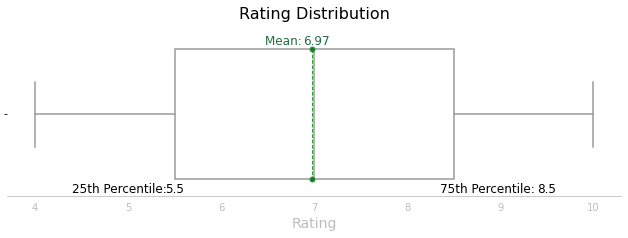

In [328]:
# Creating copy of dataframe
dfc2 = df.copy()

# Distribution of Unit Price (continuos) varaible
fig, ax = plt.subplots(figsize=(11, 3))

# Plotting te box plot
ax2 = sns.boxplot(x=dfc2['Rating'], color='white', showmeans=True, meanline=True,
                  meanprops={"marker":"o", "markerfacecolor":"#216d41", "markersize":"5"})

mean = round(dfc2['Rating'].mean(), 2)
pctle25 = round(dfc2['Rating'].quantile(0.25), 2)
pctle75 = round(dfc2['Rating'].quantile(0.75), 2)
iqr = pctle75 - pctle25

# Setting the title for the graph
plt.title("Rating Distribution", size=16, y=1.05)

size = 12
xoffsetLabel25p = 1.1
xoffsetLabel75p = 0.15

ax2.annotate(mean, xy=(mean + 0.05, -0.43), ha='center', fontsize=size, color='#216d41')
ax2.annotate(pctle25, xy=(pctle25, 0.5), ha='center', va='bottom', fontsize=size)
ax2.annotate(pctle75, xy=(pctle75 + 1, 0.5), ha='center', va='bottom', fontsize=size)

ax2.annotate('Mean: ', xy =(mean - 0.6, -0.43), xytext =(mean - 0.5, -0.43), fontsize=size, color='#216d41')
ax2.annotate('25th Percentile: ', xy =(pctle25 - xoffsetLabel25p, 0.48), xytext =(pctle25 - xoffsetLabel25p, 0.48), fontsize=size)
ax2.annotate('75th Percentile: ', xy =(pctle75 - xoffsetLabel75p, 0.48), xytext =(pctle75 - xoffsetLabel75p, 0.48), fontsize=size)

# Annote with mute color the whiskers
clrScheme1MildMuted = '#bfbdbd'

# GRAPH CURATION
# ---- 1) Removing unneccesary chart Borders ----
sns.despine(right=True, left=True, top=True, bottom=False, ax=ax2)

# ---- 2) Removing unneccesary tick marks ----
ax2.tick_params(bottom=False)

# ---- 3) Muting x values ----
ax2.tick_params(axis='x', colors=clrScheme1MildMuted)

# ---- 4) Muting x axes ----
ax2.spines['bottom'].set_color(clrScheme1MildMuted)

# ---- 5) Changing x,y axis labels and size ----
ax.set_xlabel("Rating", fontsize= size + 2, color=clrScheme1MildMuted)

<div style="color: #2f80d0">
<b>Q1. Summarise your findings from the visual.</b><br>
<b>Ans:</b> The graph for Rating Variable Dictribution has a Normal Distribution - as the mean and median lines in the box are very close by, at center of the distribution.<br><br>

<b>Q2. The reason for selecting the chart type you did</b><br>
<b>Ans:</b> We can use either Histogram or Box Plot for analysing the distribution of "Ranking" Data. We used Boxplot here as it best shows the 5 point summary of the data including the 25th percentile value, 50th percentile value (the median), 75th percentile value etc. And as the mean and the median lines coincide, it shows the data is normally distributed.<br><br>

<b>Q3. Mention the pre-attentive attributes used.(atleast 2)</b><br>
<b>Ans:</b> Preattentive attributes used:<br>
<i>a) Color:</i> The preattentive attribute color of Mean line are catchy to the audiance eyes.<br>
<i>b) Contrast:</i> The preattentive attribute constrast helps focus on Boxplot by bringing the axis labels, the secondary info, to the Background<br>
<i>c) Size:</i> Size of x labels are catchy, hence they form the preattentive attribute<br><br>

<b>Q4. Mention the gestalt principles used.(atleast 2)</b><br>
<b>Ans:</b> Gestalt Principles used:<br>
<i>a) Law of Continuity:</i> The mean line in the graph are dotted but they give a feel of a continuous line hence following the Gestalt's law of continuity<br>
<i>b) Law of Similarity:</i> The color of label indicating the mean uses the Gestalt's Law of Similarity as both the line and the label text are of same color.<br>
<i>c) Law of Proximity:</i> The text labels for the 25th percentile, 75th percentile and the mean text are closer to the respective lines, hence employing the Gestalt's Law of Proximity.<br>
</div>

### Question 3
<h4>For each payment method,compare the product lines.Does any stand out?.<br><br>
    Write the python code in the below cell to create appropriate visual to perform the above task.
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>
    

In [350]:
# Function to Annotating labels
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        j=0
        highlightValuess = [0, 5, 7]
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
            value = '{:.0f}'.format(p.get_height())

            # Muting other marker labels
            if(j not in highlightValuess):
                ax.text(_x, _y, value, ha="center", size=12, color='#b6b6b6')

            # Highlighting values
            if(j in highlightValuess):
                ax.text(_x, _y, value, ha="center", size=14, color='red')
                ax.annotate(" - Max", xy=(_x + 0.1, _y), ha='center', fontsize=size, color='red')
            
            j = j + 1

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

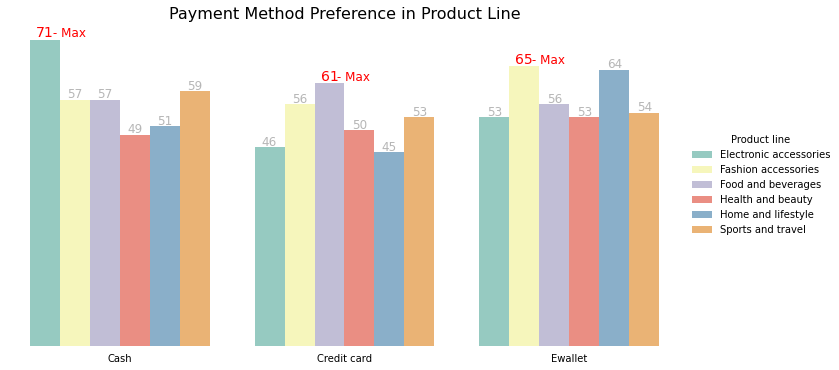

In [421]:
# Preparing the dataset
dfc3Cat = df[['Payment','Product line','Invoice ID']].groupby(['Payment','Product line'],as_index=False).count()

# Plotting graph with the dataset
ax3 = sns.catplot(data=dfc3Cat, y='Invoice ID', x='Payment', kind='bar',
                hue='Product line', height=5, aspect=2, palette="Set3")

# Setting the title for the graph
plt.title("Payment Method Preference in Product Line", size=16, y=2.05)

# Mark labels barplot
show_values(ax3.axes[0,0])

# GRAPH CURATION
# ---- 1) Removing tickmarks ----
plt.tick_params(left=False, bottom=False)

# ---- 2) Removing unneccesary chart Borders ----
sns.despine(right=True, left=True, top=True, bottom=True)

# ---- 3) Removing x values ----
ax3.set(yticklabels=[])

# ---- 4) Removing x,y labels ----
ax3.set(xlabel=None)
ax3.set(ylabel=None)



<div style="color: #2f80d0">
<b>Q1. Summarise your findings from the visual.</b><br>
<b>Ans:</b> When comparing the "Payment method Preferences" in the Product Line, the graph shows:<br>
<i>a) Cash is the most preferred mode of payment for "Electronic accessories" whereas least in 'Health and beauty'</i><br>
<i>b) Credit Card is the most preferred mode of payment for "Food and Beverages" whereas least is 'Home and Lifestyle'</i><br>
<i>c) Ewallet is the most preferred mode of payment for "Fashion Accessories" whereas least is in 'Home and Lifestyle'</i><br><br>
 

<b>Q2. The reason for selecting the chart type you did</b><br>
<b>Ans:</b> For categorical Data bar graphs are best to do the comparison between the values, here we want to compare the mode of payment in the various product lines. For that, the Bar Graph is best choice. Bar plots are multi-purpose, highly customizable, visually compelling and easy to interpret. We could easily compare the different product lines across payment methods with bar plot.<br><br>

<b>Q3. Mention the pre-attentive attributes used.(atleast 2)</b><br>
<b>Ans:</b> Preattentive attributes used:<br>
<i>a) Color:</i> The preattentive attribute color with text label "Max" is catchy to find the maximum value at a glance.<br>
<i>b) Contrast:</i> The preattentive attribute constrast helps focus on Maximum value easily and muting the other bar label values in the background<br>
<i>c) Size:</i> Size of bar value labels are catchy for the maximum values, hence they form the preattentive attribute<br><br>

<b>Q4. Mention the gestalt principles used.(atleast 2)</b><br>
<b>Ans:</b> Gestalt Principles used:<br>
<i>a) Law of Proximity:</i> The label values are closer to the bars in the bar chart, hence following the Gestalt's law of Proximity.<br>
<i>b) Law of Enclosure:</i> There are no Chart border, still it gives a feeling of being one enclosed entity hence employing the Gestalt's Law of Enclosure.<br>
<i>c) Law of Continuity:</i> The X-axis are removed in the bar plot, still it feels to be starting at a common point due to the Gestalt's Law of Continuity<br><br>
</div>

### Question 4
<h4>Identify,which is the most appropriate time(hour) to give online disounts?<br><br>
    Write the python code in the below cell to create the appropriate visual(single visual) to perform the above task .(Prep the data as necessary)
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>
    

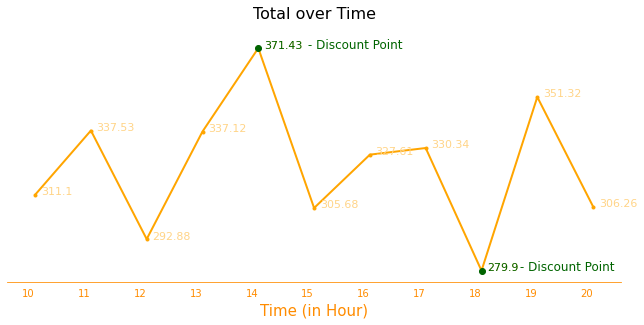

In [269]:
# Reading date values from the dataset and process
df4 = pd.read_csv('dvi-a2-ps7-data.csv', parse_dates=['Time'])
df4['hour'] = pd.to_datetime(df4['Time'], format='%H:%M').dt.hour
answers = df4.groupby(pd.Grouper(key='Time',freq='H')).mean()
dates = answers.index.hour
sums = answers['Total']

# Defining plot size
fig, ax4 = plt.subplots(figsize=(11, 5))

# Plotting the graph
plt.plot(dates, sums, linewidth=2, marker ='.', color='orange')
plt.gcf().autofmt_xdate()
plt.xticks(np.arange(min(dates), max(dates)+1, 1))
plt.xticks(rotation=0)

# Adding title
ax4.set_title("Total over Time", size=16, y=1.05)

# Calculating min and max values for deciding discoutn point
maxVal = round(sums.max(), 2)
minVal = round(sums.min(), 2)

# Defining Colors
highlightMarkerClr = 'darkgreen'
lightLabelClr = '#ffd487'
lightAxisClr = '#ffd487'
fAxissize = 13

# GRAPH CURATION
# ---- 1) Adding annotations to the bars in graph ----
for index in range(len(sums)):
    ax4.text(dates[index] + 0.1, sums[index], round(sums[index], 2),
            size=11, color=lightLabelClr)
    
    # ---- 2) Highlighting Min Max values ----
    if (round(sums[index], 2) == maxVal):
        ax4.plot(dates[index], sums[index], 'ro', color=highlightMarkerClr)
        ax4.text(dates[index] + 0.1, sums[index], round(sums[index], 2),
            size=11, color=highlightMarkerClr)
        ax4.annotate(" - Discount Point", xy=(dates[index] + 1.7, sums[index]),
            ha='center', fontsize=size, color=highlightMarkerClr)
        
    if (round(sums[index], 2) == minVal):
        ax4.plot(dates[index], sums[index], 'ro', color=highlightMarkerClr)
        ax4.text(dates[index] + 0.1, sums[index], round(sums[index], 2),
            size=11, color=highlightMarkerClr)
        ax4.annotate(" - Discount Point", xy=(dates[index] + 1.5, sums[index]),
            ha='center', fontsize=size, color=highlightMarkerClr)

# ---- 3) Changing x,y axis labels and size ----
ax4.set_xlabel("Time (in Hour)", fontsize= fAxissize + 2, color='darkorange')
ax4.set_ylabel("Total", fontsize= fAxissize + 2, color=lightAxisClr)

# ---- 4) Removing unneccesary chart Borders ----
sns.despine(right=True, left=True, top=True, bottom=False)

# ---- 5) Removing unneccesary tick marks ----
ax4.tick_params(left=False, bottom=False)

# ---- 6) Removing x values ----
ax4.set(yticklabels=[])

# ---- 7) Removing y labels ----
ax4.set(ylabel=None)

# ---- 6) Muting x axis and values ----
ax4.spines['bottom'].set_color('darkorange')
ax4.tick_params(colors='darkorange')

# Show the plot
plt.show()


<div style="color: #2f80d0">
<b>Q1. Summarise your findings from the visual.</b><br>
<b>Ans:</b> The most appropriate time to introduce discounts is when the total value of the transactions, averaged in an hour is:<br>
<i>a) At the 18th hour (6 pm), when the minimum value of transactions is 279.9, so that audiance gets encouraged to purchase more products when the sales are minimum and hence we have a better utilization of the resources</i><br>
<i>b) Or, we can intorduce Discount when the total sale values are at its peak to attract more audiance.</i><br>
Concluding: People purchase more at 14th hour and purchase least at 18th hour. So online discounts can be given at 18th hour to increase sales or at 14th hour.<br><br>

<b>Q2. The reason for selecting the chart type you did</b><br>
<b>Ans:</b> A trendline helps technical analysts determine the current direction in total prices. Tendlines can be used to gain more insight and make better decisions. Line plots are best to show time series tends. Here we want to find the best time to introduce discounts by comparing total sales over time hence the line chart is the best option here. <br><br>

<b>Q3. Mention the pre-attentive attributes used.(atleast 2)</b><br>
<b>Ans:</b> Preattentive attributes used:<br>
<i>a) Color:</i> The preattentive attribute color with text label "Discount" is catchy to find the maximum and minimum Sales value at a glance.<br>
<i>b) Contrast:</i> The preattentive attribute constrast helps focus on highlighted value easily and muting the other marker values in the background<br>
<i>c) Size:</i> Size of xaxis labels are catchy, hence they form the preattentive attribute<br><br>

<b>Q4. Mention the gestalt principles used.(atleast 2)</b><br>
<b>Ans:</b> Gestalt Principles used:<br>
<i>a) Law of Proximity:</i> The label values are closer to the line markers in the line plot, hence following the Gestalt's law of Proximity.<br>
<i>b) Law of Similarity:</i> The label text and the label markers are having same colors, hence following the Gestalt's Law of Continuity<br>
<i>c) Law of Enclosure:</i> There are no Chart border, still it gives a feeling of being one enclosed entity hence employing the Gestalt's Law of Enclosure.<br><br>
</div>

### Question 5

<h4>Which product line is more profitable?<br><br>
    Write the python code in the below cell to create the appropriate visual(single visual) to perform the above task .(Prep the data as necessary)
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>
    

[Text(0, 0.5, '')]

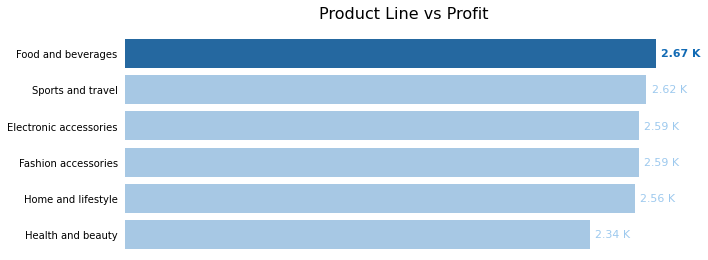

In [326]:
# Creating a copy of the dataframe
dfc5 = df.copy()

# Calculating profit = Total - costofgoodssold
dfc5['Profit'] = dfc5['Total'] - dfc5['costofgoodssold']

# Preparing data for display
dfc5Cat = dfc5[['Product line','Profit']].groupby(['Product line'],as_index=False).sum().round(2)


# Colors for the bar graph
highLightColor = '#116ab4'
mutedColor = '#9dc9ee'

# Sorting the results in decreasing order
dfc5Cat = dfc5Cat.sort_values(by='Profit', ascending=False)

# Plotting bar graph
values = dfc5Cat['Profit']
clrs = [mutedColor if (x < max(values)) else highLightColor for x in values ]
plt.figure(figsize=(10,4))
plots = sns.barplot(x="Profit", y="Product line", data=dfc5Cat, palette=clrs)
 
# Setting the title for the graph
plt.title("Product Line vs Profit", size=16, y=1.05)


# GRAPH CURATION
# ---- 1) Adding annotations to the bars in graph ----

i=0;

# Iterrating over bars
for bar in plots.patches:
    
    if (i == 0):
        # Annotating points in the bars, fixing their position and values
        plots.annotate(format(((bar.get_width() / 1000)), '.2f')  + ' K',
                       (bar.get_width() * 1.01, i * (bar.get_height() + 0.2)),
                       va='center', size=11, xytext=(0, 0), textcoords='offset points',
                       weight='bold', color=highLightColor)
    else:
        # Annotating points in the bars, fixing their position and values
        plots.annotate(format(((bar.get_width() / 1000)), '.2f')  + ' K',
                       (bar.get_width() * 1.01, i * (bar.get_height() + 0.2)),
                       va='center', size=11, xytext=(0, 0), textcoords='offset points',
                       weight='normal', color=mutedColor)
    
    i = i + 1


# ---- 2) Removing unneccesary chart Borders ----
sns.despine(right=True, left=True, top=True, bottom=True)

# ---- 3) Removing unneccesary tick marks ----
plots.tick_params(left=False, bottom=False)

# ---- 4) Removing x values ----
plots.set(xticklabels=[])

# ---- 5) Removing x,y labels ----
plots.set(xlabel=None)
plots.set(ylabel=None)

<div style="color: #2f80d0">
<b>Q1. Summarise your findings from the visual.</b><br>
<b>Ans:</b> In the bar graph of Product Line vs Profit we find the "Food and Beverages" product line has the most profit.<br><br>

<b>Q2. The reason for selecting the chart type you did</b><br>
<b>Ans:</b> A Bar plots are multi-purpose, highly customizable, visually compelling, easy to interpret. Hence they can be used to give a quick comparison view to the audiances.<br><br>

<b>Q3. Mention the pre-attentive attributes used.(atleast 2)</b><br>
<b>Ans:</b> Preattentive attributes used:<br>
<i>a) Intensity:</i> The preattentive attribute Intensity is used to catch the bar with max profit easily.<br>
<i>b) Contrast:</i> The preattentive attribute constrast helps focus on highlighted value easily and muting the other marker values in the background<br>
<i>c) Length:</i> Length of bar catches our pre attentiveness to figure out the product line with max profit value.<br><br>

<b>Q4. Mention the gestalt principles used.(atleast 2)</b><br>
<b>Ans:</b> Gestalt Principles used:<br>
<i>a) Law of Focal Point:</i> The bar values of the "Food and Beverages" are highlighted whereas the other bars muted indicating Gestalt's law of Focal point.<br>
<i>b) Law of Similarity:</i> The label text and the bars are having same colors, hence following the Gestalt's Law of Similarity<br>
<i>c) Law of Proximity:</i> There bar value labels are closer to the bars, hence employing the Gestalt's Law of Proximity.<br>
</div>

# Group's choice-2 Marks
 
#### Frame 1 (more) question which will help in the EDA(Exploratory Data Analysis) of the given data set and answer the same using the best visual.
 
 1. Write the question in a markdown cell
 2. Below the question,in a coding cell,write the python code to create the visual to answer the question  

<h4> Answer in markdown cells below the visual <br><br>
   1.Summarise your findings from the visual.<br>
   2.The reason for selecting the chart type you did <br>
   3.Mention the pre-attentive attributes used.(atleast 2)<br>
   4.Mention the gestalt principles used.(atleast 2)<br>
  

### Question 6

<h4>Compare Customer type across the branches</h4>

In [393]:
# Function to Annotating labels
def show_label_values(axs, orient="v", space=.01):
    def _single(ax):
        j=0
        highlightValuess = [0, 3]
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
            value = '{:.0f}'.format(p.get_height())

            # Muting other marker labels
            if(j not in highlightValuess):
                ax.text(_x, _y + 1.2, value, ha="center", size=14, color='#b6b6b6')

            # Highlighting values
            if(j in highlightValuess):
                ax.text(_x, _y + 1.2, value, ha="center", size=14, color='orange', weight='bold')
            
            j = j + 1

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

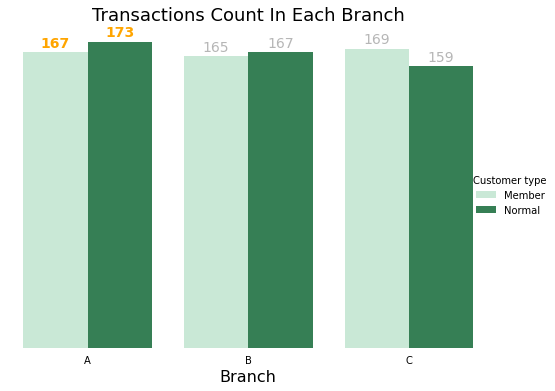

In [422]:
# Copying the dataset
dfc6 = df.copy()

# Preparing data for plot and plotting the graph
dfc6Cat = dfc6[['Branch','Customer type','Invoice ID']].groupby(['Branch','Customer type'],as_index=False).count()
colors = ["#2a8b53" if i == 'Normal' else "#c4edd5" for i in dfc6Cat['Customer type']]
ax6 = sns.catplot(data=dfc6Cat, y='Invoice ID', x='Branch', kind='bar', hue='Customer type',
                  height=5, aspect=2, palette=colors)

# Adding title
plt.title("Transactions Count In Each Branch", size=18, y=2.4)

ax6.fig.set_figwidth(8)
ax6.fig.set_figheight(5)

# GRAPH CURATION
# ---- 1) Adding annotations to the bars in graph ----
show_label_values(ax6.axes[0,0])

# ---- 2) Removing unneccesary chart Borders ----
sns.despine(right=True, left=True, top=True, bottom=True)

# ---- 3) Removing unneccesary tick marks ----
plt.tick_params(left=False, bottom=False)

# ---- 4) Removing x values ----
ax6.set(yticklabels=[])

# ---- 5) Removing x,y labels ----
ax6.set(ylabel=None)

# ---- 6) Adding X-label size ----
plt.xlabel('Branch', fontsize=16)

plt.show()

<div style="color: #2f80d0">
<b>Q1. Summarise your findings from the visual.</b><br>
<b>Ans:</b> For the Transaction count in each branch graph we find that, Non-Members (Normal) do more purchases at Branches A and B than the members, hence offers can be introduced to them to get a membership and get discounts for their purchases and increasing the customer base for the organization.<br><br>

<b>Q2. The reason for selecting the chart type you did</b><br>
<b>Ans:</b> A Bar plots are multi-purpose, highly customizable, visually compelling, easy to interpret. Hence they can be used to give a quick comparison view to the audiances.<br><br>

<b>Q3. Mention the pre-attentive attributes used.(atleast 2)</b><br>
<b>Ans:</b> Preattentive attributes used:<br>
<i>a) Color:</i> The preattentive attribute color catches our eyes to find the count of transaction of the members and the normal users.<br>
<i>b) Contrast:</i> The preattentive attribute constrast helps focus on highlighted value easily and muting the other bar label values in the background<br>
<i>c) Length:</i> Length of bar catches our pre attentiveness to figure out the product line with max profit value.<br><br>

<b>Q4. Mention the gestalt principles used.(atleast 2)</b><br>
<b>Ans:</b> Gestalt Principles used:<br>
<i>a) Law of Focal Point:</i> The bar label values for "Branch A" are highlighted whereas the other bars values muted indicating Gestalt's law of Focal point.<br>
<i>c) Law of Proximity:</i> There bar value labels are closer to the bars, hence employing the Gestalt's Law of Proximity.<br>
<i>b) Law of Continuity:</i> Even though the y-axis is visibly absent, still it feels taht the bars start at a line  following the Gestalt's Law of Continuity<br>
</div>

<h1><center> ************ END OF ASSIGNMENT ****************</center></h1>